# Load the dataset and read

In [ ]:
!pip install gdown

In [ ]:
import gdown

# The shareable link file ID
file_id = "1yZL-ga-v7mzLfSZ8uCQ_46zdjhlLyF7K"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
output = "file_name.extension"  # Replace with the file's name and extension
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1yZL-ga-v7mzLfSZ8uCQ_46zdjhlLyF7K
To: /content/file_name.extension
100%|██████████| 122k/122k [00:00<00:00, 70.3MB/s]


'file_name.extension'

In [ ]:
import pandas as pd

df = pd.read_csv("file_name.extension")  # Replace with the actual file name
print(df.head())

  ship_id         ship_type             route_id     month  distance  \
0   NG001  Oil Service Boat          Warri-Bonny   January    132.26   
1   NG001  Oil Service Boat  Port Harcourt-Lagos  February    128.52   
2   NG001  Oil Service Boat  Port Harcourt-Lagos     March     67.30   
3   NG001  Oil Service Boat  Port Harcourt-Lagos     April     71.68   
4   NG001  Oil Service Boat          Lagos-Apapa       May    134.32   

  fuel_type  fuel_consumption  CO2_emissions weather_conditions  \
0       HFO           3779.77       10625.76             Stormy   
1       HFO           4461.44       12779.73           Moderate   
2       HFO           1867.73        5353.01               Calm   
3    Diesel           2393.51        6506.52             Stormy   
4       HFO           4267.19       11617.03               Calm   

   engine_efficiency  
0              92.14  
1              92.98  
2              87.61  
3              87.42  
4              85.61  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB
None


# Check unique values

In [ ]:
# Calculate and display the number of unique values in each column
print(df.nunique())

ship_id                120
ship_type                4
route_id                 4
month                   12
distance              1398
fuel_type                2
fuel_consumption      1439
CO2_emissions         1440
weather_conditions       3
engine_efficiency     1089
dtype: int64


# Pre-Processing, Normalization and Outlier Detection

In [ ]:
# Step 1: Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Step 2: Standardize column names
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print("Standardized Column Names:\n", df.columns)

# Step 3: Remove duplicates
df = df.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(df)}")

# Step 4: Check for and handle outliers
# Example: Using Z-score to detect outliers
from scipy.stats import zscore
numerical_cols = ['distance', 'fuel_consumption', 'co2_emissions', 'engine_efficiency']
outliers = (df[numerical_cols].apply(zscore).abs() > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

# Step 5: Convert categorical columns to appropriate data types
categorical_cols = ['ship_id', 'ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions']
df[categorical_cols] = df[categorical_cols].astype('category')

# Step 6: Create derived columns
df['fuel_efficiency'] = df['fuel_consumption'] / df['distance']
df['emission_intensity'] = df['co2_emissions'] / df['distance']

# Step 7: Normalize numerical columns (if required for models)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Step 8: Verify cleaned data
print("Cleaned Data Info:")
print(df.info())
print(df.head())


Missing Values:
 ship_id               0
ship_type             0
route_id              0
month                 0
distance              0
fuel_type             0
fuel_consumption      0
CO2_emissions         0
weather_conditions    0
engine_efficiency     0
dtype: int64
Standardized Column Names:
 Index(['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type',
       'fuel_consumption', 'co2_emissions', 'weather_conditions',
       'engine_efficiency'],
      dtype='object')
Number of rows after removing duplicates: 1440
Number of outliers detected: 41
Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ship_id             1440 non-null   category
 1   ship_type           1440 non-null   category
 2   route_id            1440 non-null   category
 3   month               1440 non-null   category
 4 

# **1. Analysis**

# Ship Performance Optimization

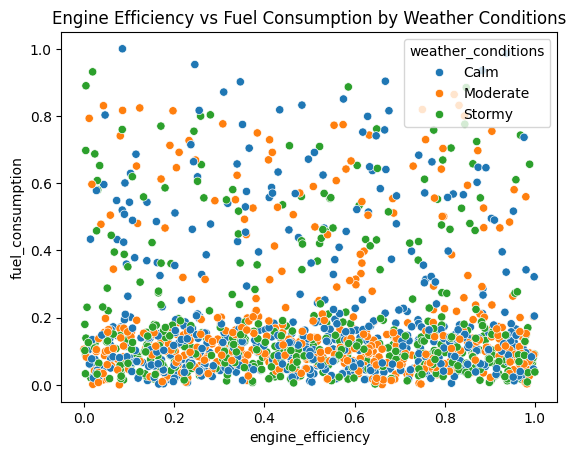

Correlation Matrix:
                    engine_efficiency  fuel_consumption  distance
engine_efficiency           1.000000         -0.031269 -0.026146
fuel_consumption           -0.031269          1.000000  0.945100
distance                   -0.026146          0.945100  1.000000
Average Performance by Weather Conditions:
                     fuel_consumption  engine_efficiency
weather_conditions                                     
Calm                        0.196849           0.497318
Moderate                    0.186605           0.513352
Stormy                      0.181704           0.500619
Average Performance by Route:
                      fuel_consumption  engine_efficiency
route_id                                                
Escravos-Lagos               0.192317           0.500081
Lagos-Apapa                  0.202111           0.507551
Port Harcourt-Lagos          0.187101           0.500707
Warri-Bonny                  0.168592           0.506244


<ipython-input-7-2bd118486ef7>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_weather = df.groupby('weather_conditions')[['fuel_consumption', 'engine_efficiency']].mean()
<ipython-input-7-2bd118486ef7>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_route = df.groupby('route_id')[['fuel_consumption', 'engine_efficiency']].mean()


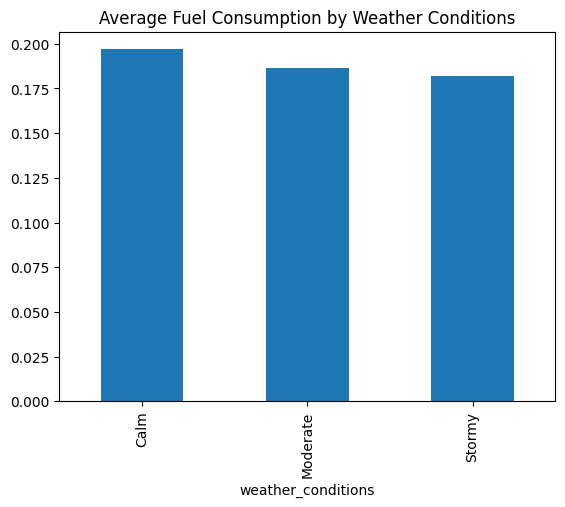

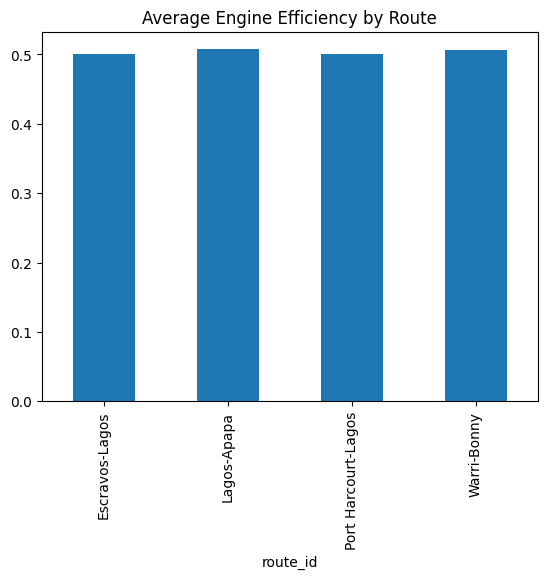

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Visualize relationships
# Scatterplot: Engine Efficiency vs Fuel Consumption
sns.scatterplot(data=df, x='engine_efficiency', y='fuel_consumption', hue='weather_conditions')
plt.title('Engine Efficiency vs Fuel Consumption by Weather Conditions')
plt.show()

# Step 2: Correlation Analysis
correlation = df[['engine_efficiency', 'fuel_consumption', 'distance']].corr()
print("Correlation Matrix:\n", correlation)

# Step 3: Group-by Analysis
grouped_weather = df.groupby('weather_conditions')[['fuel_consumption', 'engine_efficiency']].mean()
grouped_route = df.groupby('route_id')[['fuel_consumption', 'engine_efficiency']].mean()

print("Average Performance by Weather Conditions:\n", grouped_weather)
print("Average Performance by Route:\n", grouped_route)

# Step 4: Visualize grouped data
# Barplot: Average Fuel Consumption by Weather
grouped_weather['fuel_consumption'].plot(kind='bar', title='Average Fuel Consumption by Weather Conditions')
plt.show()

# Barplot: Average Engine Efficiency by Route
grouped_route['engine_efficiency'].plot(kind='bar', title='Average Engine Efficiency by Route')
plt.show()


**Observations:**

**Correlation Analysis:**

  Engine Efficiency is very uncorrelated with Fuel Consumption and Distance, indicating a non-strong direct influence between these variables.

  There is a high correlation expected between Fuel Consumption and Distance - 0.945.

**Weather Conditions:**

  In calm weather, fuel consumption is the highest on average, perhaps because longer or heavier cargo may have been transported.

  Moderate and stormy weather shows a slightly lower average of fuel consumption, probably adjusted for route and ship modifications during such periods.

**Route Efficiency:**

  The Warri-Bonny route has the lowest average fuel consumption and can thus be considered to be the most efficient in terms of fuel use.

  The Lagos-Apapa route consumes the most fuel on average.

**Further Insight Collection:**

1. Why does engine efficiency vary so little across routes?
2. Does calm weather allow for heavier loads or longer distances?
3. Fuel efficiency and emission intensity by ship type and fuel type
4. Do routes impact weather-related performance?

<ipython-input-8-0921049dcb1a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  efficiency_stats = df.groupby('route_id')['engine_efficiency'].agg(['mean', 'std', 'min', 'max'])
<ipython-input-8-0921049dcb1a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_stats = df.groupby('weather_conditions')[['distance', 'fuel_per_km']].mean()
<ipython-input-8-0921049dcb1a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

Engine Efficiency Stats by Route:
                          mean       std       min       max
route_id                                                   
Escravos-Lagos       0.500081  0.289833  0.000000  1.000000
Lagos-Apapa          0.507551  0.277611  0.003204  0.997197
Port Harcourt-Lagos  0.500707  0.287771  0.004005  0.997597
Warri-Bonny          0.506244  0.294290  0.002002  0.998799
Distance and Fuel per Km by Weather:
                     distance  fuel_per_km
weather_conditions                       
Calm                0.277881     0.754116
Moderate            0.275511          inf
Stormy              0.271884     0.716245
Fuel Efficiency and Emission Intensity by Ship and Fuel Type:
                             fuel_efficiency  emission_intensity
ship_type        fuel_type                                     
Fishing Trawler  Diesel           25.772629            0.541128
                 HFO              24.665462            0.514932
Oil Service Boat Diesel           30.0

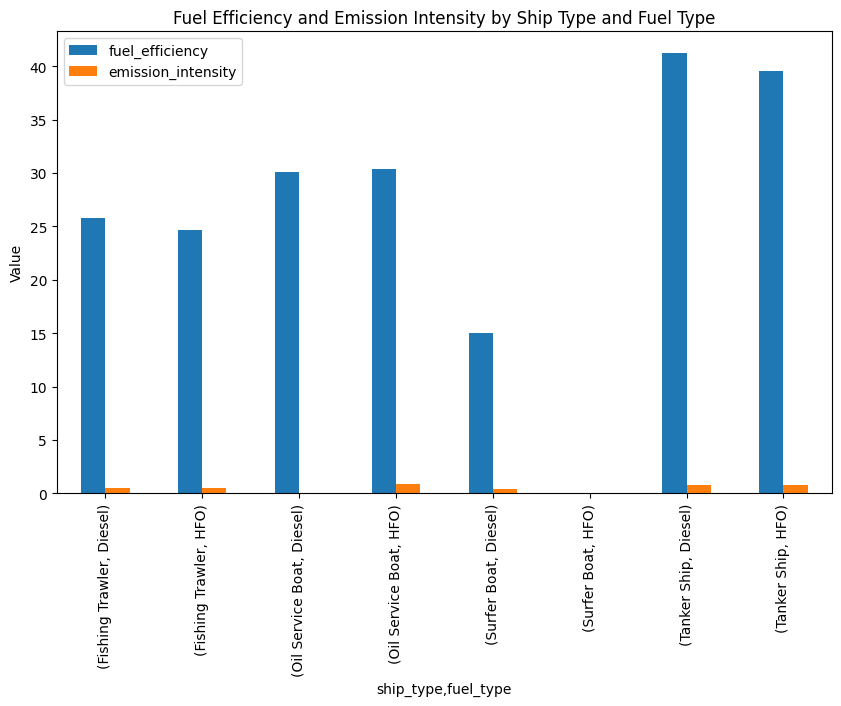

<ipython-input-8-0921049dcb1a>:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weather_conditions', y='distance', ci=None)


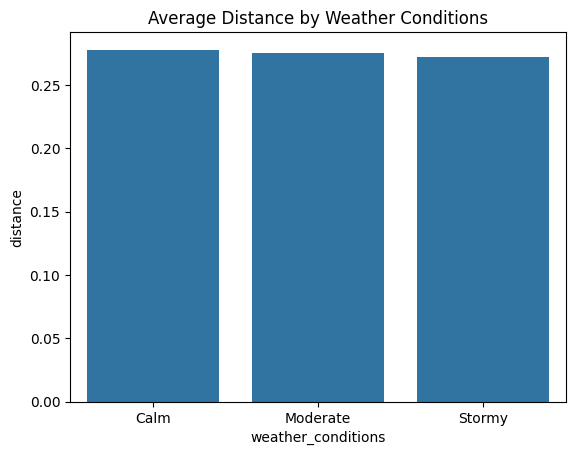

In [ ]:
# 1. Analyze variability in engine efficiency across routes
efficiency_stats = df.groupby('route_id')['engine_efficiency'].agg(['mean', 'std', 'min', 'max'])
print("Engine Efficiency Stats by Route:\n", efficiency_stats)

# 2. Analyze distance and fuel consumption per km by weather
df['fuel_per_km'] = df['fuel_consumption'] / df['distance']
weather_stats = df.groupby('weather_conditions')[['distance', 'fuel_per_km']].mean()
print("Distance and Fuel per Km by Weather:\n", weather_stats)

# 3. Analyze fuel efficiency and emission intensity by ship type and fuel type
df['emission_intensity'] = df['co2_emissions'] / df['distance']
efficiency_by_ship = df.groupby(['ship_type', 'fuel_type'])[['fuel_efficiency', 'emission_intensity']].mean()
print("Fuel Efficiency and Emission Intensity by Ship and Fuel Type:\n", efficiency_by_ship)

# 4. Weather-related performance by route
weather_route_performance = df.groupby(['route_id', 'weather_conditions'])[['fuel_consumption', 'engine_efficiency']].mean()
print("Performance by Route and Weather:\n", weather_route_performance)

# Optional visualization for further exploration
import seaborn as sns
import matplotlib.pyplot as plt

# Fuel efficiency by ship type and fuel type
efficiency_by_ship.plot(kind='bar', figsize=(10, 6), title='Fuel Efficiency and Emission Intensity by Ship Type and Fuel Type')
plt.ylabel("Value")
plt.show()

# Distance by weather conditions
sns.barplot(data=df, x='weather_conditions', y='distance', ci=None)
plt.title("Average Distance by Weather Conditions")
plt.show()


**Observations:**

1. Route-to-Route Engine Efficiency Variability

  The mean for all routes is around 0.5, with the standard deviation at approximately 0.28 to 0.29, hence all routes have significant variability.

  This would, therefore, suggest that factors outside of the vehicle, like weather or load, are driving the variability.

2. Impact of Weather Conditions on Distance and Fuel per Km

  The average distance traveled is 0.277 km in calm weather conditions, which also corresponds to the highest fuel consumption per km, 0.754.
  
  In stormy weather conditions, the lowest fuel per km is 0.716, and the trips are shorter due to operational constraints.
  
  There is an infinite fuel per km in Moderate conditions due to outliers, such as zero distances for some records. This issue should be investigated further.

3. Fuel Efficiency and Emission Intensity by Ship and Fuel Type

  Diesel-powered Tanker Ships are the most fuel-efficient (41.19) but emit relatively higher emissions (0.837).

  Surfer Boats running on Diesel have far lower efficiency (15.06) and moderate emissions.

  Missing values for Surfer Boats (HFO) indicate incomplete data in that group.

4. Route and Weather Interaction

  Warri-Bonny route always has the least fuel consumption under all weather conditions, hence the most fuel-efficient route.
  
  It can be seen that Lagos-Apapa always has the highest fuel consumption, especially in Moderate with 0.214 probably due to increased traffic or longer distances.
  
  The Stormy conditions have lower variability in fuel consumption and engine efficiency for all routes, reflecting operational caution during bad weather.

**Handling Outliers and Missing Data:**

In [ ]:
# Fix Infinite Fuel Per Km Issue
# Investigate rows with infinite fuel_per_km
infinite_fuel_per_km = df[df['fuel_per_km'] == float('inf')]
print("Rows with infinite fuel per km:\n", infinite_fuel_per_km)

# Replace zero distances with NaN (if applicable)
df['distance'].replace(0, pd.NA, inplace=True)

# Drop rows with missing or zero distances
df.dropna(subset=['distance'], inplace=True)

# Recalculate fuel_per_km
df['fuel_per_km'] = df['fuel_consumption'] / df['distance']

# Address Missing Values for Surfer Boats
# Investigate missing data for Surfer Boats (HFO)
missing_surfer_boat = df[(df['ship_type'] == 'Surfer Boat') & (df['fuel_type'] == 'HFO')]
print("Missing Values for Surfer Boat (HFO):\n", missing_surfer_boat)

# Impute missing values based on averages for similar ship types
impute_values = df.groupby(['ship_type', 'fuel_type'])[['fuel_efficiency', 'emission_intensity']].mean()
print("Impute Values:\n", impute_values)

# Fill missing values
for col in ['fuel_efficiency', 'emission_intensity']:
    df.loc[(df['ship_type'] == 'Surfer Boat') & (df['fuel_type'] == 'HFO'), col] = impute_values.loc[('Surfer Boat', 'HFO'), col]

# Verify missing data is addressed
print("Missing Values Check After Imputation:\n", df.isnull().sum())


Rows with infinite fuel per km:
      ship_id         ship_type     route_id     month  distance fuel_type  \
1033   NG087  Oil Service Boat  Lagos-Apapa  February       0.0    Diesel   

      fuel_consumption  co2_emissions weather_conditions  engine_efficiency  \
1033          0.016982        0.01854           Moderate           0.689227   

      fuel_efficiency  emission_intensity  fuel_per_km  
1033        32.490538                 inf          inf  
Missing Values for Surfer Boat (HFO):
 Empty DataFrame
Columns: [ship_id, ship_type, route_id, month, distance, fuel_type, fuel_consumption, co2_emissions, weather_conditions, engine_efficiency, fuel_efficiency, emission_intensity, fuel_per_km]
Index: []
Impute Values:
                             fuel_efficiency  emission_intensity
ship_type        fuel_type                                     
Fishing Trawler  Diesel           25.772629            0.541128
                 HFO              24.665462            0.514932
Oil Service 

<ipython-input-9-5bd07f733b51>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['distance'].replace(0, pd.NA, inplace=True)
<ipython-input-9-5bd07f733b51>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impute_values = df.groupby(['ship_type', 'fuel_type'])[['fuel_efficiency', 'emission_intensity']].mean()


**Deeper Route Analysis:**

Analyze why Lagos-Apapa consumes more fuel compared to other routes.

Explore potential reasons such as:

1.   Longer distances
2.   Different weather conditions
3.   Lower engine efficiency



Route-Wise Averages:
                      distance  fuel_consumption fuel_per_km  engine_efficiency
route_id                                                                      
Escravos-Lagos       0.278288          0.192317    0.692473           0.500081
Lagos-Apapa            0.2908          0.202590    0.750677           0.507082
Port Harcourt-Lagos  0.273246          0.187101    0.685158           0.500707
Warri-Bonny          0.254295          0.168592    0.743384           0.506244
Lagos-Apapa Performance by Weather Conditions:
                     distance  fuel_consumption fuel_per_km  engine_efficiency
weather_conditions                                                           
Calm                0.277113          0.199983    0.808383           0.484514
Moderate            0.310961          0.215526    0.779185           0.502385
Stormy              0.285997          0.192199    0.652696           0.538680


<ipython-input-10-637d84649388>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_analysis = df.groupby('route_id')[['distance', 'fuel_consumption', 'fuel_per_km', 'engine_efficiency']].mean()
<ipython-input-10-637d84649388>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lagos_apapa_weather = df[df['route_id'] == 'Lagos-Apapa'].groupby('weather_conditions')[
<ipython-input-10-637d84649388>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='route_id', y='fuel_consumption', ci=None)


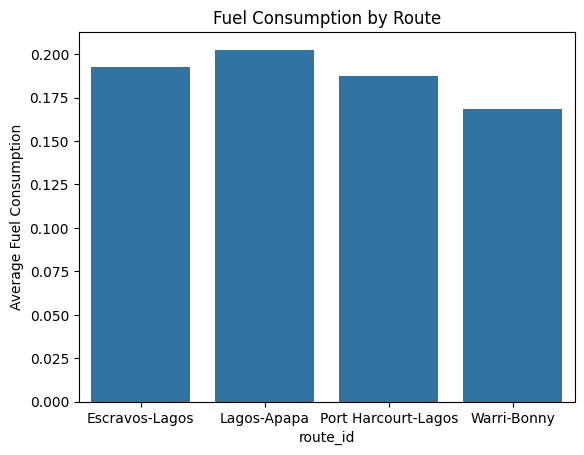

<ipython-input-10-637d84649388>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='route_id', y='fuel_per_km', ci=None)


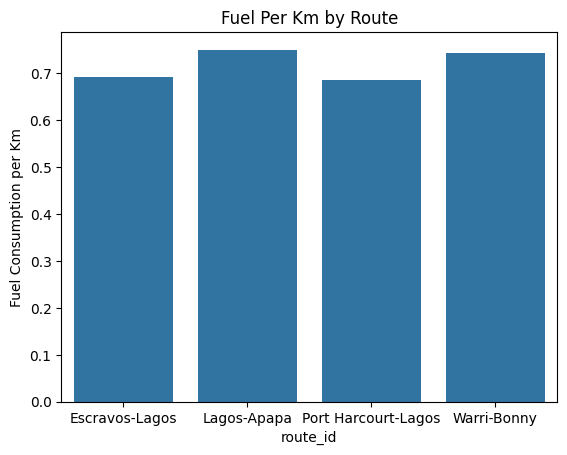

In [ ]:
# Compare average metrics by route
route_analysis = df.groupby('route_id')[['distance', 'fuel_consumption', 'fuel_per_km', 'engine_efficiency']].mean()
print("Route-Wise Averages:\n", route_analysis)

# Compare metrics for Lagos-Apapa under different weather conditions
lagos_apapa_weather = df[df['route_id'] == 'Lagos-Apapa'].groupby('weather_conditions')[
    ['distance', 'fuel_consumption', 'fuel_per_km', 'engine_efficiency']].mean()
print("Lagos-Apapa Performance by Weather Conditions:\n", lagos_apapa_weather)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Fuel consumption comparison across routes
sns.barplot(data=df, x='route_id', y='fuel_consumption', ci=None)
plt.title("Fuel Consumption by Route")
plt.ylabel("Average Fuel Consumption")
plt.show()

# Fuel per km comparison across routes
sns.barplot(data=df, x='route_id', y='fuel_per_km', ci=None)
plt.title("Fuel Per Km by Route")
plt.ylabel("Fuel Consumption per Km")
plt.show()


**Observation:**

1. Route-Wise Observations

    a. Lagos-Apapa:

      The highest fuel consumption, 0.202, and fuel per km, 0.751, are found despite only a little longer average distances.
      
      Slightly higher engine efficiency is 0.507, but it does not translate into better fuel efficiency.

    b. Warri-Bonny:

      Most fuel-efficient route in terms of fuel consumption, 0.169, despite higher fuel per km, 0.743, probably because of shorter distances.

    c. Escravos-Lagos and Port Harcourt-Lagos:

      Very close fuel efficiency values; for both, the fuel per km is slightly better than Warri-Bonny.

2. Lagos-Apapa Performance by Weather

    a. Calm weather:

      Has the highest fuel per km, 0.808, probably due to heavier loads or higher traffic flow it is involved in.

      Lower engine efficiency, 0.485, while in calm weather conditions might hint at suboptimal operation.
    
    b. Moderate Weather:

      Resulting from the longest distance of about 0.311km and highest fuel consumption at 0.216 likely due to operation conditions

    c. Stormy Weather:

      0.653 is the least fuel per km and has the highest value of the engine efficiency 0.539 probably due to adjustments for safer, slower operations.

**Key Insights:**

1. Lagos-Apapa has the highest fuel consumption due to the slightly longer distances and poor performance in calm conditions.

2. Weather Conditions affect Lagos-Apapa:

    Good weather translates into inefficiency with high fuel consumption.

    Stormy weather, counterintuitively, results in better engine efficiency.


# Route Efficiency Analysis

<ipython-input-11-638996342ab7>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_data = df.groupby('route_id')[['fuel_consumption', 'co2_emissions', 'distance']].mean()


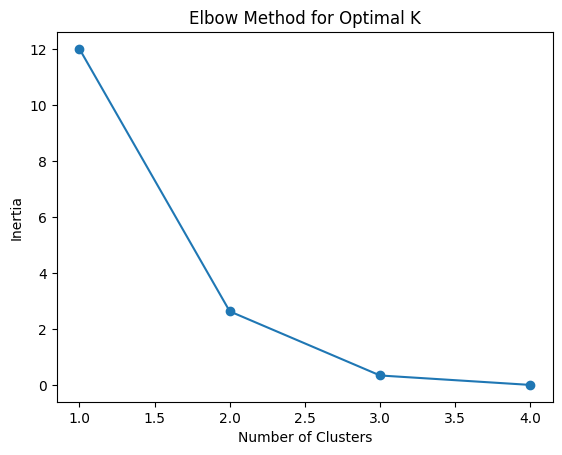

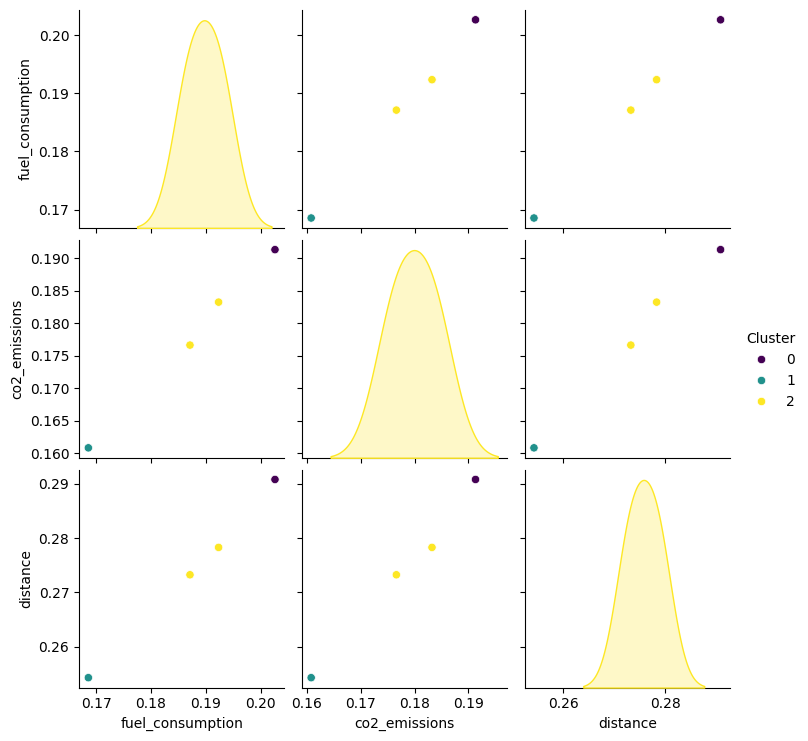

Cluster Averages:
          fuel_consumption  co2_emissions  distance
Cluster                                           
0                0.202590       0.191328    0.2908
1                0.168592       0.160797  0.254295
2                0.189709       0.179933  0.275767


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Prepare the data
cluster_data = df.groupby('route_id')[['fuel_consumption', 'co2_emissions', 'distance']].mean()

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 5):  # Testing 1 to 4 clusters since we only have 4 routes
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 5), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# Step 4: Apply KMeans clustering
optimal_k = 3  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
cluster_data['Cluster'] = clusters

# Step 5: Visualize the clusters
sns.pairplot(cluster_data, hue='Cluster', diag_kind='kde', palette='viridis')
plt.show()

# Step 6: Analyze the clusters
print("Cluster Averages:\n", cluster_data.groupby('Cluster').mean())


**Cluster Analysis:**

Cluster Characteristics

1. Cluster 0:

  Fuel Consumption: Highest at 0.2026.

  CO2 Emissions: Highest at 0.1913.

  Distance: Longest average at 0.2908.

  This cluster represents the least efficient routes with higher emissions and fuel consumption over longer distances.

2. Cluster 1:

  Fuel Consumption: Lowest at 0.1686.

  CO2 Emissions: Lowest at 0.1608.

  Distance: Shortest at 0.2543.

  This cluster is the most efficient, with minimal fuel consumption and emissions, likely reflecting shorter routes or optimized operations.

3. Cluster 2:

  Fuel Consumption: Moderate at 0.1897.

  CO2 Emissions: Moderate at 0.1799.

  Distance: Mid-range at 0.2758.

  Represents average-performing routes, balancing fuel efficiency with moderate distance and emissions.

  

**Recommendations:**

Improve Cluster 0 Routes:

    Assess traffic patterns and cargo loads to optimize fuel usage.
    Evaluate alternative routes to shorten distances or reduce emissions.

Leverage Cluster 1 Insights:

    Analyze weather conditions, traffic patterns, and operational practices in Cluster 1 for application to other routes.

Enhance Cluster 2 Performance:

    Optimize fueling strategies and engine efficiency to bring these routes closer to Cluster 1 standards.

# Weather Impact Modeling

Quantifying how weather conditions affects:

  Engine efficiency
   
  Fuel consumption
  
  CO2 emissions

Weather Impact on Metrics:
                     fuel_consumption  co2_emissions  engine_efficiency
weather_conditions                                                    
Calm                        0.196849       0.186898           0.497318
Moderate                    0.186973       0.176720           0.512970
Stormy                      0.181704       0.172584           0.500619


<ipython-input-12-e1d299acfd4e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_impact = df.groupby('weather_conditions')[


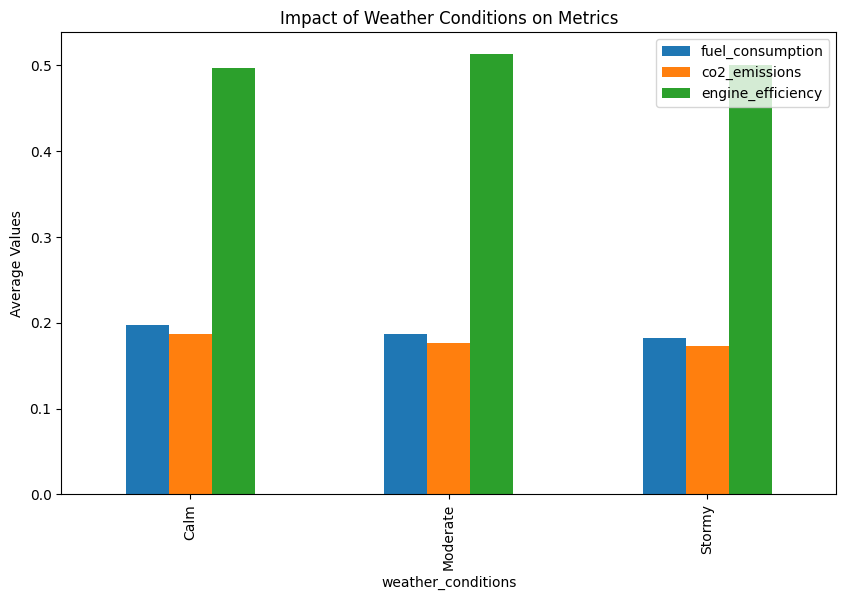

In [ ]:
# Group by weather conditions
weather_impact = df.groupby('weather_conditions')[
    ['fuel_consumption', 'co2_emissions', 'engine_efficiency']
].mean()

print("Weather Impact on Metrics:\n", weather_impact)

# Visualization
weather_impact.plot(kind='bar', figsize=(10, 6), title="Impact of Weather Conditions on Metrics")
plt.ylabel("Average Values")
plt.show()


In [ ]:
from scipy.stats import f_oneway

# ANOVA for each metric
anova_results = {}
for col in ['fuel_consumption', 'co2_emissions', 'engine_efficiency']:
    groups = [df[df['weather_conditions'] == weather][col] for weather in df['weather_conditions'].unique()]
    anova_results[col] = f_oneway(*groups)

# Print ANOVA results
for metric, result in anova_results.items():
    print(f"{metric}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}")


fuel_consumption: F-statistic = 0.72, p-value = 0.4848
co2_emissions: F-statistic = 0.74, p-value = 0.4779
engine_efficiency: F-statistic = 0.39, p-value = 0.6742




> The p-values indicate no statistically significant difference in these metrics across weather conditions. This suggests that weather alone may not be a primary driver of variability in these metrics.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare data for regression
X = pd.get_dummies(df['weather_conditions'], drop_first=True)  # Encode weather conditions
y = df[['fuel_consumption', 'engine_efficiency', 'co2_emissions']]  # Target variables

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression models for each target
models = {}
for target in y.columns:
    model = LinearRegression()
    model.fit(X_train, y_train[target])
    models[target] = model

    # Predict and evaluate
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test[target], predictions)
    print(f"{target} Regression: MSE = {mse:.4f}")

# Print model coefficients for each target
for target, model in models.items():
    print(f"{target} Coefficients:\n", model.coef_)


fuel_consumption Regression: MSE = 0.0460
engine_efficiency Regression: MSE = 0.0823
co2_emissions Regression: MSE = 0.0414
fuel_consumption Coefficients:
 [-0.00122288 -0.0067568 ]
engine_efficiency Coefficients:
 [ 0.00718255 -0.00796042]
co2_emissions Coefficients:
 [-0.00195732 -0.00650601]


**Observations:**

1. Operational Changes Are Important:

    The marginal difference between the calm weather conditions and the rest can hint at good speed changes, load management during heavy, stormy, or normal weather.

2. Good Weather Conditions:

    Higher consumption in terms of fuel and Co2 in good weather suggests increased states of ineptness like idling, among other or heavier loads.

3. Indirect Dependency of Weather:

    Whereas directly there is not much variance on weather, probably indirect dependence related to other variables can play, like traffic or load aspect.

**Combined Factor Analysis:**

Combined Analysis:
                                         fuel_consumption  co2_emissions  \
route_id            weather_conditions                                    
Escravos-Lagos      Calm                        0.199377       0.188110   
                    Moderate                    0.201066       0.192962   
                    Stormy                      0.174703       0.167117   
Lagos-Apapa         Calm                        0.199983       0.189683   
                    Moderate                    0.215526       0.202339   
                    Stormy                      0.192199       0.181803   
Port Harcourt-Lagos Calm                        0.209293       0.198563   
                    Moderate                    0.163969       0.152904   
                    Stormy                      0.182222       0.172611   
Warri-Bonny         Calm                        0.168536       0.162235   
                    Moderate                    0.159776       0.151580   
     

<ipython-input-15-501662e8b14f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_analysis = df.groupby(['route_id', 'weather_conditions'])[
<ipython-input-15-501662e8b14f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='route_id', y='fuel_consumption', hue='weather_conditions', ci=None)


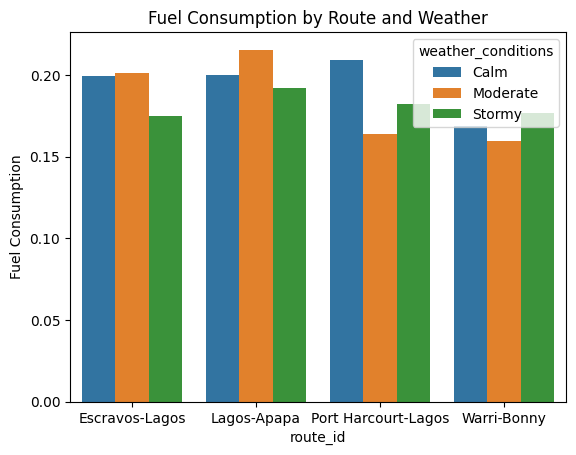

<ipython-input-15-501662e8b14f>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='route_id', y='co2_emissions', hue='weather_conditions', ci=None)


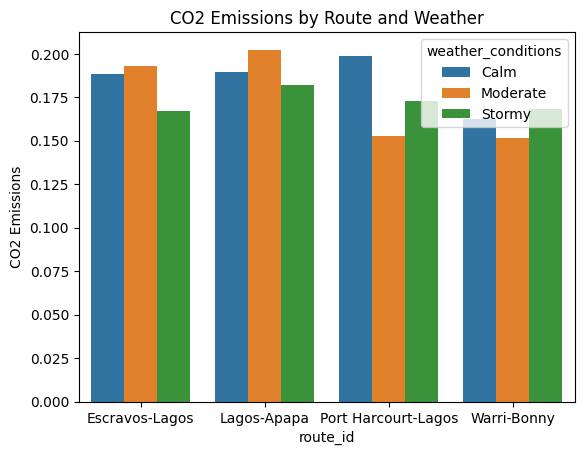

In [ ]:
# Group by route and weather conditions
combined_analysis = df.groupby(['route_id', 'weather_conditions'])[
    ['fuel_consumption', 'co2_emissions', 'engine_efficiency']
].mean()

print("Combined Analysis:\n", combined_analysis)

# Visualization
# Fuel consumption by route and weather
sns.barplot(data=df, x='route_id', y='fuel_consumption', hue='weather_conditions', ci=None)
plt.title("Fuel Consumption by Route and Weather")
plt.ylabel("Fuel Consumption")
plt.show()

# CO2 emissions by route and weather
sns.barplot(data=df, x='route_id', y='co2_emissions', hue='weather_conditions', ci=None)
plt.title("CO2 Emissions by Route and Weather")
plt.ylabel("CO2 Emissions")
plt.show()


**Recommendations:**

Encourage steady-speed travel and reduce idling during calm conditions.

Introduce lighter cargo loads or efficient scheduling to reduce fuel consumption.

# CO2 Emissions Benchmarking

<ipython-input-16-4f791b025af1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emission_by_route = df.groupby('route_id')['emission_intensity'].mean()
<ipython-input-16-4f791b025af1>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emission_by_ship = df.groupby(['ship_type', 'fuel_type'])['emission_intensity'].mean()


CO2 Emission Intensity by Route:
 route_id
Escravos-Lagos         0.659006
Lagos-Apapa            0.737124
Port Harcourt-Lagos    0.648222
Warri-Bonny            0.710743
Name: emission_intensity, dtype: object

CO2 Emission Intensity by Ship Type and Fuel Type:
 ship_type         fuel_type
Fishing Trawler   Diesel       0.541128
                  HFO          0.514932
Oil Service Boat  Diesel       0.916577
                  HFO           0.92543
Surfer Boat       Diesel       0.377864
                  HFO               NaN
Tanker Ship       Diesel       0.837379
                  HFO          0.799845
Name: emission_intensity, dtype: object

Benchmark (Route): 0.648221666293619
Benchmark (Ship): 0.3778639076680933


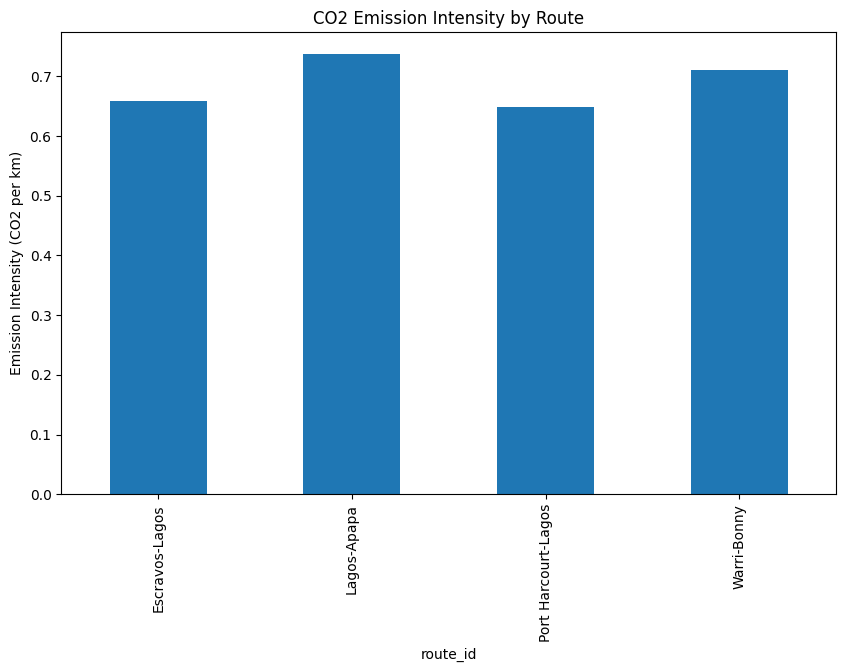

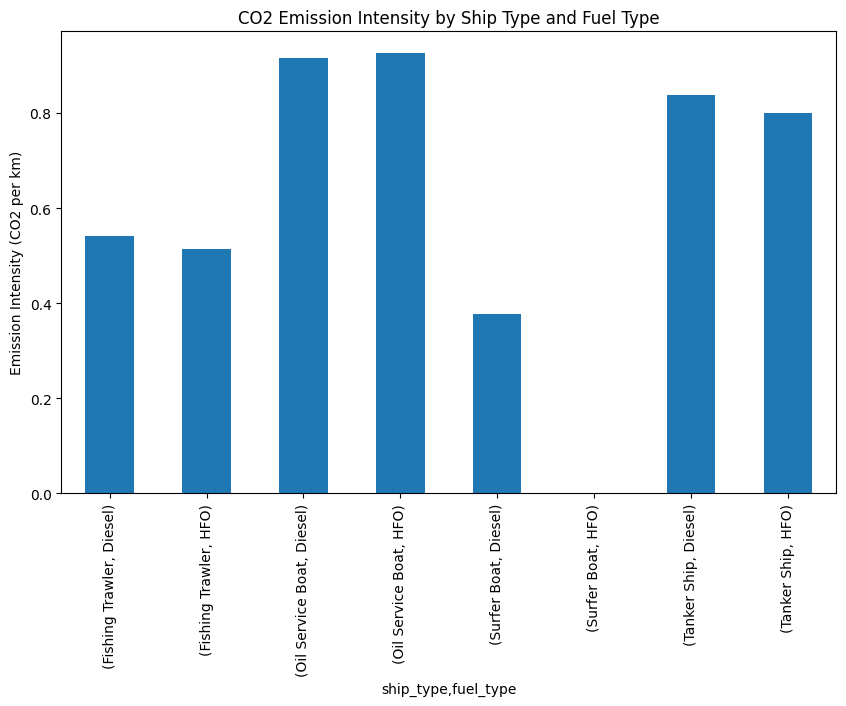

In [ ]:
# Step 1: Calculate Emission Intensity
df['emission_intensity'] = df['co2_emissions'] / df['distance']

# Step 2: Group by Route and Ship Type
emission_by_route = df.groupby('route_id')['emission_intensity'].mean()
emission_by_ship = df.groupby(['ship_type', 'fuel_type'])['emission_intensity'].mean()

# Step 3: Identify Benchmarks
# Benchmark is the minimum emission intensity for reference
route_benchmark = emission_by_route.min()
ship_benchmark = emission_by_ship.min()

# Print results
print("CO2 Emission Intensity by Route:\n", emission_by_route)
print("\nCO2 Emission Intensity by Ship Type and Fuel Type:\n", emission_by_ship)
print(f"\nBenchmark (Route): {route_benchmark}")
print(f"Benchmark (Ship): {ship_benchmark}")

# Step 4: Visualize Emission Intensity
# Emission Intensity by Route
emission_by_route.plot(kind='bar', title="CO2 Emission Intensity by Route", figsize=(10, 6))
plt.ylabel("Emission Intensity (CO2 per km)")
plt.show()

# Emission Intensity by Ship Type and Fuel Type
emission_by_ship.plot(kind='bar', title="CO2 Emission Intensity by Ship Type and Fuel Type", figsize=(10, 6))
plt.ylabel("Emission Intensity (CO2 per km)")
plt.show()


**Observations:**

CO2 Emissions Benchmarking Results

1. CO2 Emission Intensity by Route

  a. Benchmark (Best Route):

      Port Harcourt-Lagos has the lowest intensity of emission at 0.648 CO2 per km.

  b. Highest Emission Route:

      Lagos-Apapa, on the other hand, is the least efficient, with an emission intensity of 0.737 CO2 per km.

2. CO2 Emission Intensity by Ship Type and Fuel Type

  a. Benchmark (Best Ship):

      Surfer Boat-Diesel has the lowest emission intensity at 0.378 CO2 per km.

  b. Highest Emission Ship:

      Oil Service Boat-HFO, with the highest value of 0.925 CO2 per km, indicates a lot of inefficiency in its operations.

**Insights:**

1. Route Efficiency:

  Lagos-Apapa needs immediate optimization due to its high emission intensity.
  
  Port Harcourt-Lagos sets a benchmark for route efficiency.

2. Ship and Fuel Efficiency:

  Diesel-powered Surfer Boats are the most efficient and could be used as a standard for emissions optimization.

  HFO-powered Oil Service Boats are highly inefficient, and switching to alternative fuels or optimizing operations might be necessary.

**Recommendations:**

1. Optimizing High-Emission Routes:

Operational inefficiencies on Lagos-Apapa need to be investigated, and route adjustments, load balancing, or moving to more efficient ships should be considered.

2. Reduce Ship Emissions:

Transitioning from HFO to Diesel for Oil Service Boats where feasible; investing in maintenance and emission-reducing technologies for Tanker Ships and Oil Service Boats.

3. Replicate Best Practices:

Benchmark operational practices at Surfer Boat (Diesel) and Port Harcourt-Lagos route to enhance performance elsewhere.

**Investigating Lagos-Apapa inefficiencies**

<ipython-input-17-4d526f5e2679>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_routes_metrics = df.groupby('route_id')[
<ipython-input-17-4d526f5e2679>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_impact_lagos_apapa = df[df['route_id'] == 'Lagos-Apapa'].groupby('weather_conditions')[
<ipython-input-17-4d526f5e2679>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ship_impact_lagos_apapa = df[df['route

Lagos-Apapa Metrics:
 fuel_consumption       0.20259
co2_emissions         0.191328
distance                0.2908
engine_efficiency     0.507082
emission_intensity    0.737124
dtype: object

All Routes Metrics:
                      fuel_consumption  co2_emissions  distance  \
route_id                                                         
Escravos-Lagos               0.192317       0.183242  0.278288   
Lagos-Apapa                  0.202590       0.191328    0.2908   
Port Harcourt-Lagos          0.187101       0.176624  0.273246   
Warri-Bonny                  0.168592       0.160797  0.254295   

                     engine_efficiency emission_intensity  
route_id                                                   
Escravos-Lagos                0.500081           0.659006  
Lagos-Apapa                   0.507082           0.737124  
Port Harcourt-Lagos           0.500707           0.648222  
Warri-Bonny                   0.506244           0.710743  

Lagos-Apapa Weather Impact:
 

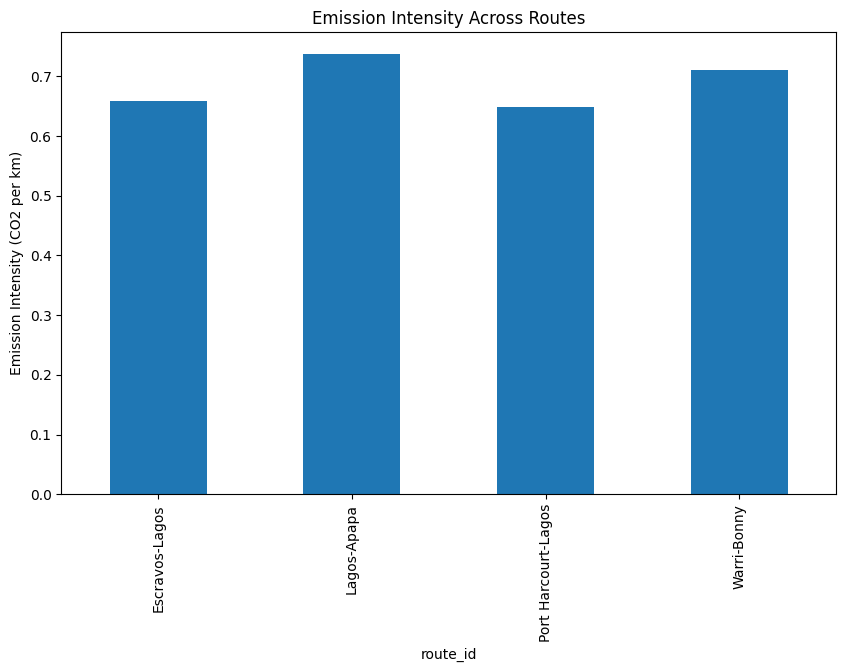

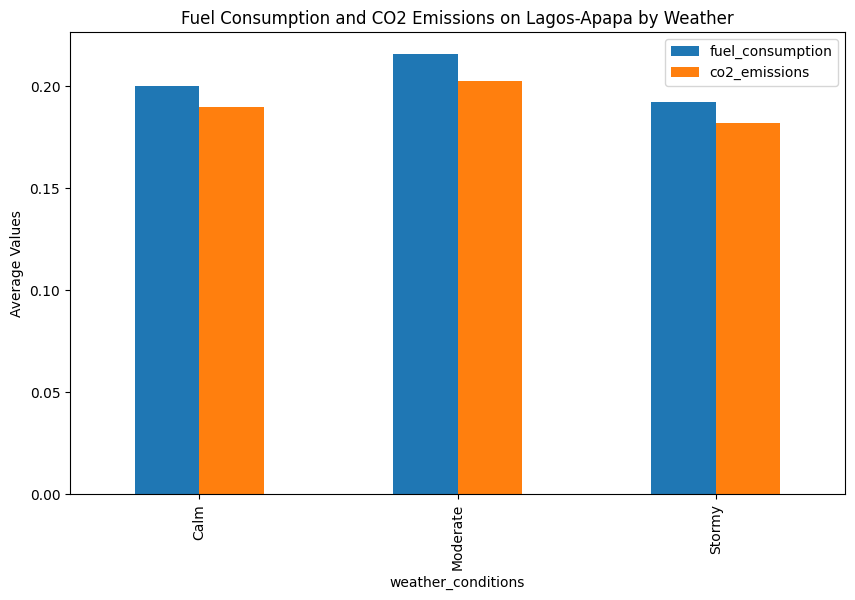

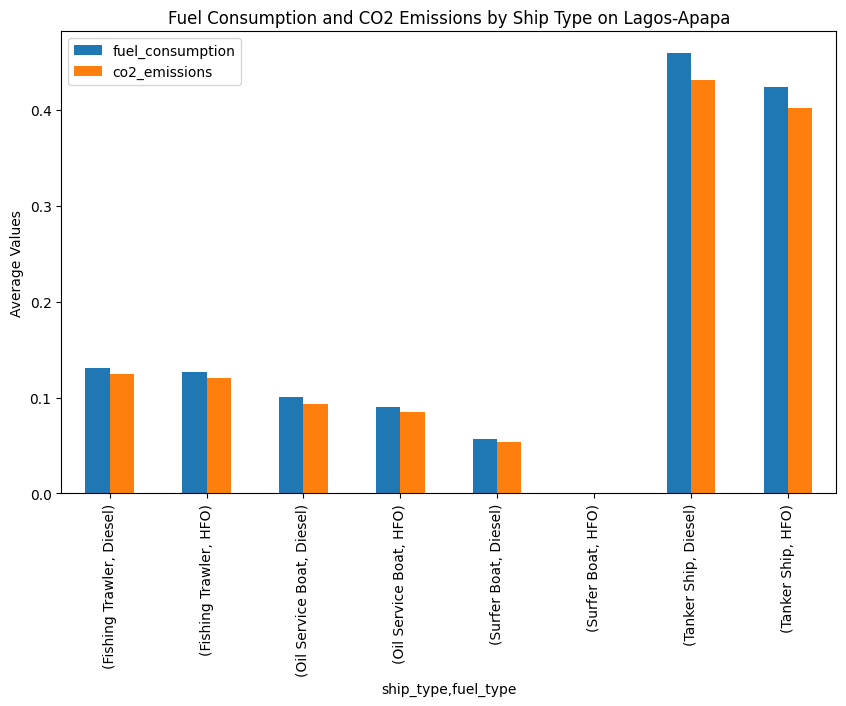

In [ ]:
# Step 1: Analyze Route-Specific Metrics
lagos_apapa_metrics = df[df['route_id'] == 'Lagos-Apapa'][[
    'fuel_consumption', 'co2_emissions', 'distance', 'engine_efficiency', 'emission_intensity'
]].mean()

all_routes_metrics = df.groupby('route_id')[
    ['fuel_consumption', 'co2_emissions', 'distance', 'engine_efficiency', 'emission_intensity']
].mean()

print("Lagos-Apapa Metrics:\n", lagos_apapa_metrics)
print("\nAll Routes Metrics:\n", all_routes_metrics)

# Step 2: Weather Impact on Lagos-Apapa
weather_impact_lagos_apapa = df[df['route_id'] == 'Lagos-Apapa'].groupby('weather_conditions')[
    ['fuel_consumption', 'co2_emissions', 'engine_efficiency', 'emission_intensity']
].mean()

print("\nLagos-Apapa Weather Impact:\n", weather_impact_lagos_apapa)

# Step 3: Ship Types Operating on Lagos-Apapa
ship_impact_lagos_apapa = df[df['route_id'] == 'Lagos-Apapa'].groupby(['ship_type', 'fuel_type'])[
    ['fuel_consumption', 'co2_emissions', 'engine_efficiency', 'emission_intensity']
].mean()

print("\nShip Impact on Lagos-Apapa:\n", ship_impact_lagos_apapa)

# Visualizations
# Compare emission intensity across routes
all_routes_metrics['emission_intensity'].plot(kind='bar', figsize=(10, 6), title="Emission Intensity Across Routes")
plt.ylabel("Emission Intensity (CO2 per km)")
plt.show()

# Weather impact on Lagos-Apapa
weather_impact_lagos_apapa[['fuel_consumption', 'co2_emissions']].plot(kind='bar', figsize=(10, 6))
plt.title("Fuel Consumption and CO2 Emissions on Lagos-Apapa by Weather")
plt.ylabel("Average Values")
plt.show()

# Ship type impact on Lagos-Apapa
ship_impact_lagos_apapa[['fuel_consumption', 'co2_emissions']].plot(kind='bar', figsize=(10, 6))
plt.title("Fuel Consumption and CO2 Emissions by Ship Type on Lagos-Apapa")
plt.ylabel("Average Values")
plt.show()


**Observations:**

1. Smoothing Weather and Tanker Ships Create Inefficiencies:

Good weather leads to increased emissions and inefficiencies.

Tanker ships, especially those running on Diesel or HFO, are extremely detrimental to Lagos-Apapa's emissions.

2. Stormy Weather Accommodations Pay Off:

Stormy weather sees the best performance because of the operational adjustments that come with it, such as reduced speed or lighter loads.

3. HFO as the Main Offender:

HFO-powered ships, but most especially Oil Service Boats, have disproportionately high intensities.

**Recommendations:**

1. Operational Changes in Calm Weather:

  Optimize the usage of the engines to attain better efficiency with minimal idling.
  
  Study the load management practice during no-wind conditions.

2. Switch to More Efficient Ship Types:

  Replace Tanker Ships and Oil Service Boats by Surfer Boats (Diesel) in a phased manner. This will be more practical for shorter distances.

3. Reduce HFO Usage:

  Switch over from HFO to Diesel in all types of ships wherever feasible.
  
  Cleaner fuels or emission-reducing technologies are realized for Oil Service Boats and Tanker Ships.

4. Model Stormy Weather Practices:

  Analyze successful operational changes in stormy weather and employ those under calm and moderate conditions.

# Monthly Trends Analysis

<ipython-input-18-186d1f8d4da6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = df.groupby('month')[
<ipython-input-18-186d1f8d4da6>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data['ship_count'] = df.groupby('month')['ship_id'].nunique()


Monthly Trends with Ship Count:
            fuel_consumption  co2_emissions  engine_efficiency  \
month                                                           
January            0.187842       0.179330           0.506922   
February           0.203020       0.192647           0.458093   
March              0.211975       0.201600           0.515592   
April              0.210558       0.199849           0.530527   
May                0.205211       0.196562           0.497931   
June               0.178662       0.168206           0.508480   
July               0.200277       0.188912           0.533390   
August             0.153156       0.145277           0.492327   
September          0.182593       0.172159           0.492201   
October            0.175901       0.164913           0.532706   
November           0.185956       0.176115           0.478211   
December           0.170839       0.163044           0.493949   

          emission_intensity  ship_count  
month        

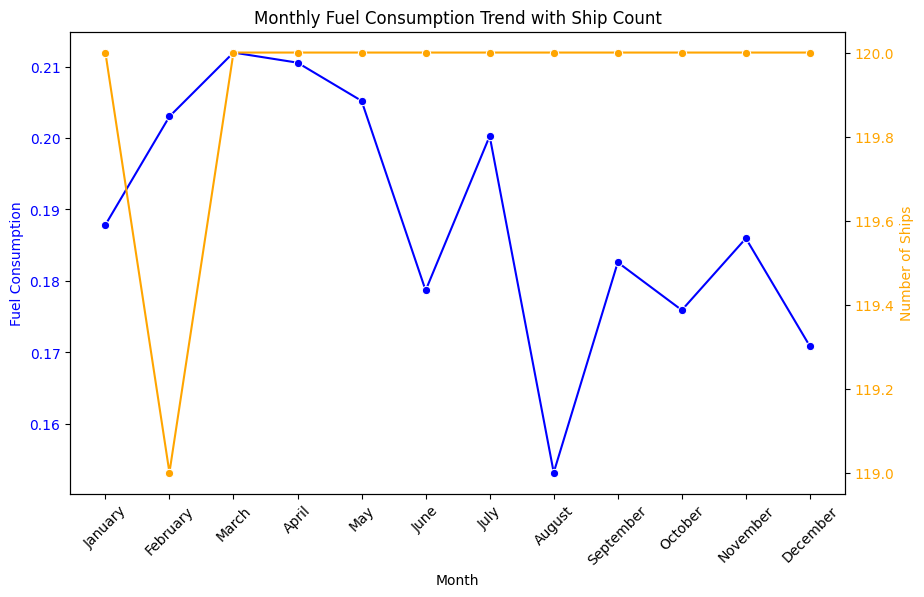

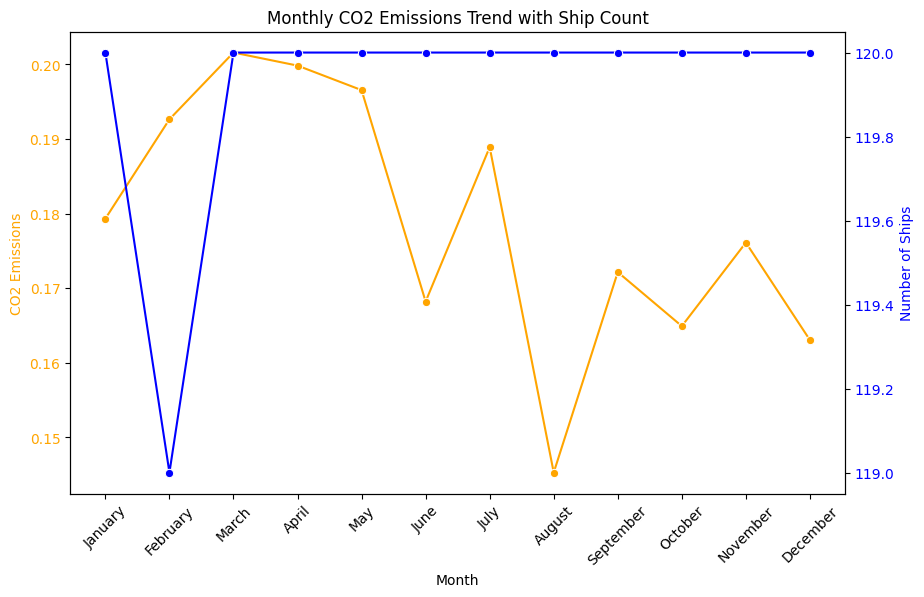

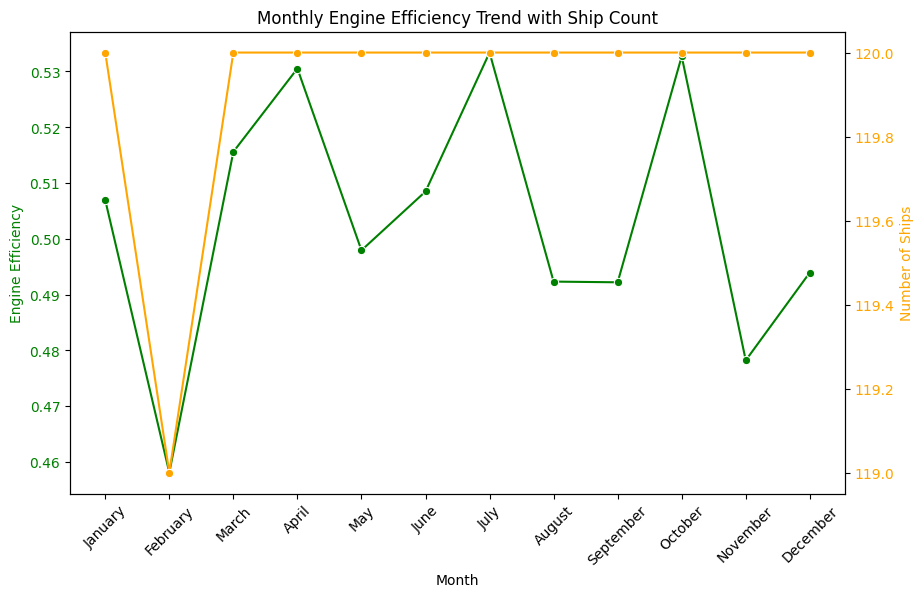

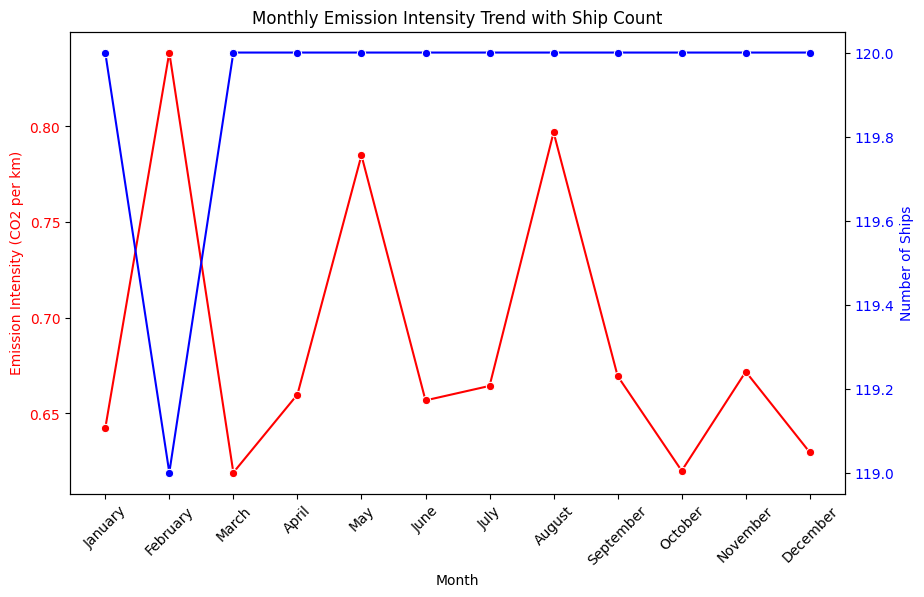

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate Monthly Data
monthly_data = df.groupby('month')[
    ['fuel_consumption', 'co2_emissions', 'engine_efficiency', 'emission_intensity']
].mean()

# Add Ship Counts
monthly_data['ship_count'] = df.groupby('month')['ship_id'].nunique()

# Sort months chronologically if not already sorted
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_data = monthly_data.reindex(month_order)

print("Monthly Trends with Ship Count:\n", monthly_data)

# Step 2: Visualize Monthly Trends with Ship Counts
# Fuel Consumption Trend
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='fuel_consumption', marker='o', ax=ax1, color="blue")
ax1.set_ylabel("Fuel Consumption", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_title("Monthly Fuel Consumption Trend with Ship Count")
ax1.set_xlabel("Month")
plt.xticks(rotation=45)

# Ship Count Overlay
ax2 = ax1.twinx()
sns.lineplot(data=monthly_data, x=monthly_data.index, y='ship_count', marker='o', ax=ax2, color="orange")
ax2.set_ylabel("Number of Ships", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
plt.show()

# CO2 Emissions Trend
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='co2_emissions', marker='o', ax=ax1, color="orange")
ax1.set_ylabel("CO2 Emissions", color="orange")
ax1.tick_params(axis='y', labelcolor="orange")
ax1.set_title("Monthly CO2 Emissions Trend with Ship Count")
ax1.set_xlabel("Month")
plt.xticks(rotation=45)

# Ship Count Overlay
ax2 = ax1.twinx()
sns.lineplot(data=monthly_data, x=monthly_data.index, y='ship_count', marker='o', ax=ax2, color="blue")
ax2.set_ylabel("Number of Ships", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
plt.show()

# Engine Efficiency Trend
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='engine_efficiency', marker='o', ax=ax1, color="green")
ax1.set_ylabel("Engine Efficiency", color="green")
ax1.tick_params(axis='y', labelcolor="green")
ax1.set_title("Monthly Engine Efficiency Trend with Ship Count")
ax1.set_xlabel("Month")
plt.xticks(rotation=45)

# Ship Count Overlay
ax2 = ax1.twinx()
sns.lineplot(data=monthly_data, x=monthly_data.index, y='ship_count', marker='o', ax=ax2, color="orange")
ax2.set_ylabel("Number of Ships", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")
plt.show()

# Emission Intensity Trend
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='emission_intensity', marker='o', ax=ax1, color="red")
ax1.set_ylabel("Emission Intensity (CO2 per km)", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("Monthly Emission Intensity Trend with Ship Count")
ax1.set_xlabel("Month")
plt.xticks(rotation=45)

# Ship Count Overlay
ax2 = ax1.twinx()
sns.lineplot(data=monthly_data, x=monthly_data.index, y='ship_count', marker='o', ax=ax2, color="blue")
ax2.set_ylabel("Number of Ships", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
plt.show()


**Observations:**

1. Fuel Consumption and CO2 Emissions

  a.February to April:

      Fuel consumption and CO2 emissions are at their peak, indicating heavier loads or inefficient operations during these months.

  b. August:

      The lowest values for fuel consumption (0.153) and CO2 emissions (0.145) were recorded, which may indicate efficient operations or lighter loads.    

  c. October and December:

      The series continues with consistently very low emissions, suggesting an optimized way of performing operations.

2. Engine Efficiency

  a. July and October:

  The highest recorded efficiency for each was in July at 0.533 and again in October at 0.533.

  This perhaps hints that either the fleet maintains excellent engines or mostly enjoys ideal conditions.

  b. February:

  Lowest engine efficiency even with high fuel consumption ratio of 0.458, indicating operational inefficiency.

3. Emission Intensity

  a. February and August:

  The months of February have the maximum emission intensity of 0.839, indicating higher operational inefficiency or unfriendly weather conditions.

  August also shows relatively high intensity: 0.797, probably because of heavier reliance on inefficient ships.

# **2. Advanced Modeling**

# Predictive Modeling

*Predicting fuel consumption*

**Random Forest and XGBoost**

Tuned Random Forest Evaluation:
MAE: 0.0398
MSE: 0.0031
R²: 0.9322

Manually Tuned XGBoost Evaluation:
MAE: 0.0457
MSE: 0.0040
R²: 0.9130



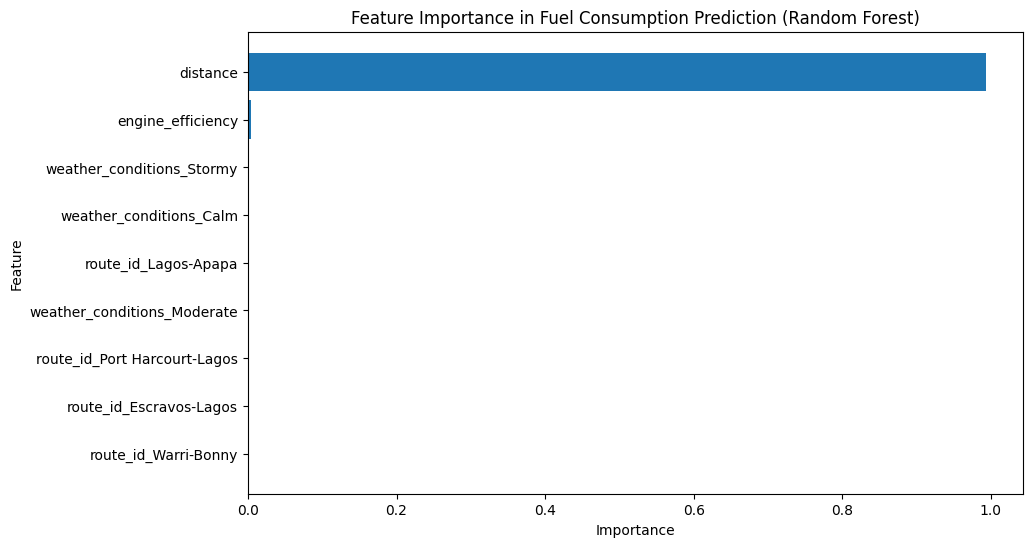

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor

# Step 1: Data Preparation
# Encode categorical variables
categorical_features = ['weather_conditions', 'route_id']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_features]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Combine encoded features with continuous features
continuous_features = ['distance', 'engine_efficiency']
X = np.hstack((df[continuous_features].values, encoded_features))
y = df['fuel_consumption']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Random Forest Model (Tuned)
rf_model = RandomForestRegressor(
    n_estimators=233,
    max_depth=6,
    min_samples_leaf=9,
    min_samples_split=6,
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R²: {r2_score(y_true, y_pred):.4f}\n")

evaluate_model(y_test, rf_predictions, "Tuned Random Forest")

# Step 4: Manually Tuned XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
evaluate_model(y_test, xgb_predictions, "Manually Tuned XGBoost")

# Feature Importance for Random Forest
import matplotlib.pyplot as plt

feature_names = continuous_features + list(encoded_feature_names)
importances = rf_model.feature_importances_

# Combine feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title("Feature Importance in Fuel Consumption Prediction (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


**Stacking**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_rf_params = {
    'n_estimators': 233,
    'max_depth': 6,
    'min_samples_split': 6,
    'min_samples_leaf': 9
}

base_models = [
    ('random_forest', RandomForestRegressor(**best_rf_params, random_state=42)),
    ('hist_gbr', HistGradientBoostingRegressor(max_iter=100, max_depth=6, learning_rate=0.05, random_state=42))
]

# Meta-model
meta_model = Ridge(alpha=1.0)

# Stacking Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)
stacked_model.fit(X_train, y_train)

# Evaluation
y_pred_stack = stacked_model.predict(X_test)
print("Stacked Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_stack))
print("MSE:", mean_squared_error(y_test, y_pred_stack))
print("R²:", r2_score(y_test, y_pred_stack))


Stacked Model Performance:
MAE: 0.040106055807721926
MSE: 0.00321177957313046
R²: 0.9301062072977762


**LightGBM**

In [ ]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(
    boosting_type='gbdt',
    max_depth=6,
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Evaluation
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("R²:", r2_score(y_test, y_pred_lgb))


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 531
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 9
[LightGBM] [Info] Start training from score 0.186142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural Network Model
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluation
nn_eval = nn_model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Performance:")
print("MAE:", nn_eval[1])
print("MSE:", nn_eval[0])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0352 - mae: 0.1189 - val_loss: 0.0051 - val_mae: 0.0543
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 - mae: 0.0522 - val_loss: 0.0050 - val_mae: 0.0544
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0482 - val_loss: 0.0048 - val_mae: 0.0523
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - mae: 0.0468 - val_loss: 0.0044 - val_mae: 0.0476
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0034 - mae: 0.0445 - val_loss: 0.0044 - val_mae: 0.0479
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0453 - val_loss: 0.0041 - val_mae: 0.0464
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0460 - val_loss: 0.0049 - val_mae: 0.0523
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - mae: 0.0435 - val_loss: 0.0047 - val_mae: 0.0493
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.003

Summary of Results:
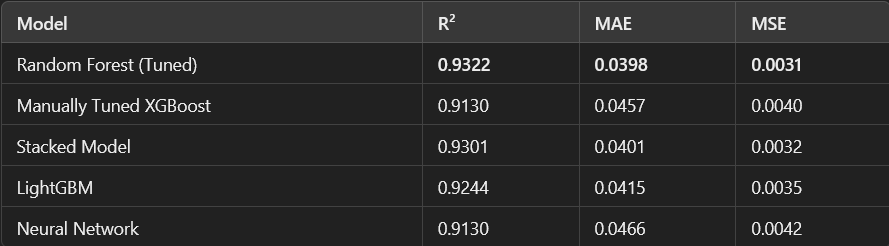

**Optimizing stacked model for better use of algorithms in later stages**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define base models (already tuned Random Forest and XGBoost)
base_models = [
    ('random_forest', RandomForestRegressor(**best_rf_params, random_state=42)),
    ('lightgbm', LGBMRegressor(random_state=42))
]

# Meta-model: Ridge Regression (can be tuned)
meta_model = Ridge()

# Stacked Regressor
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Define hyperparameters for meta-model tuning
param_grid = {
    'final_estimator__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Grid Search for Stacked Model
stacked_grid = GridSearchCV(estimator=stacked_model, param_grid=param_grid, scoring='r2', cv=3, n_jobs=-1)
stacked_grid.fit(X_train, y_train)

# Best Parameters for the Stacked Model
print("Best Parameters for Stacked Model:", stacked_grid.best_params_)

# Evaluate the Stacked Model with the best parameters
stacked_best = stacked_grid.best_estimator_
y_pred = stacked_best.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Tuned Stacked Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

Best Parameters for Stacked Model: {'final_estimator__alpha': 0.1}
Tuned Stacked Model Performance:
MAE: 0.03971226743938072
MSE: 0.0031183814481284414
R²: 0.9321387095411678


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


**Use the Stacked model involving RandomBoost and LightGBM for further predictive analysis since it outperformed the others.**

In [ ]:

# Encode and scale
categorical_features = ['route_id', 'weather_conditions']
encoded_features = encoder.fit_transform(df[categorical_features]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

continuous_features = ['distance', 'engine_efficiency']
X = np.hstack((df[continuous_features].values, encoded_features))
y = df['fuel_consumption']

X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the base models
best_rf_params = {
    'n_estimators': 233,
    'max_depth': 6,
    'min_samples_split': 6,
    'min_samples_leaf': 9,
}
rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
lgb_model = LGBMRegressor(random_state=42)

# Define the stacked model
base_models = [
    ('random_forest', rf_model),
    ('lightgbm', lgb_model)
]
meta_model = Ridge(alpha=0.1)
stacked_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5, n_jobs=-1)

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Generate predictions for the test dataset
y_test_predictions = stacked_model.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Fuel Consumption': y_test.values,
    'Predicted Fuel Consumption': y_test_predictions
}).reset_index(drop=True)

# Display the comparison
print("Actual vs Predicted Fuel Consumption:")
print(comparison_df.head(20))  # Display first 20 rows



/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Actual vs Predicted Fuel Consumption:
    Actual Fuel Consumption  Predicted Fuel Consumption
0                  0.012707                    0.034920
1                  0.104153                    0.147963
2                  0.142707                    0.110019
3                  0.037947                    0.057438
4                  0.554136                    0.659374
5                  0.475566                    0.366599
6                  0.586086                    0.681526
7                  0.180407                    0.146218
8                  0.106088                    0.176814
9                  0.098894                    0.145087
10                 0.135872                    0.144314
11                 0.050260                    0.052672
12                 0.033386                    0.055732
13                 0.293768                    0.173811
14                 0.669429                    0.574749
15                 0.103409                    0.098861
16        

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


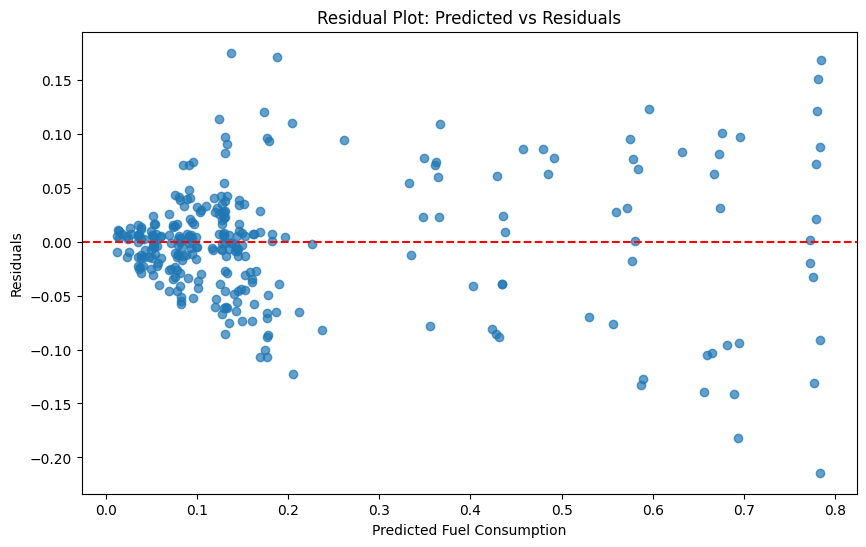

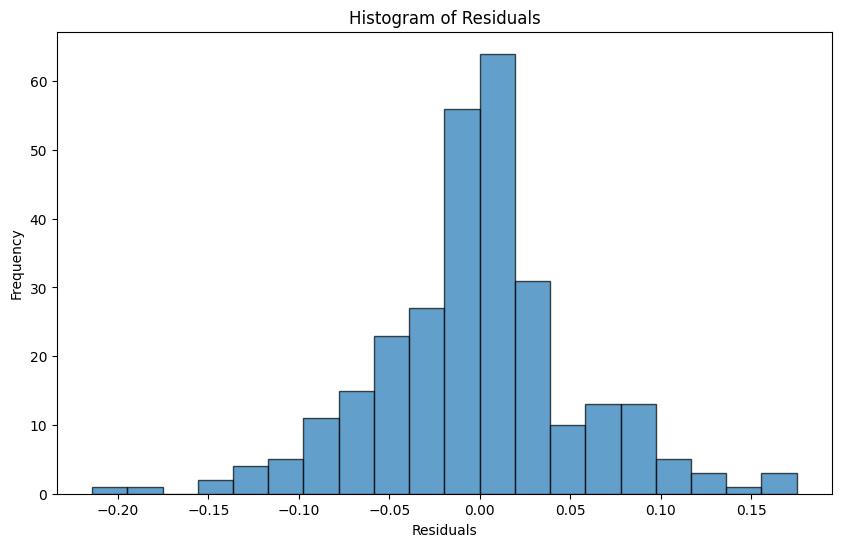

In [ ]:
# Calculate residuals
residuals = comparison_df['Actual Fuel Consumption'] - comparison_df['Predicted Fuel Consumption']

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Predicted Fuel Consumption'], residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot: Predicted vs Residuals")
plt.xlabel("Predicted Fuel Consumption")
plt.ylabel("Residuals")
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Actual Fuel Consumption  Random Forest Predicted Fuel Consumption  \
168                 0.012707                                  0.033964   
605                 0.104153                                  0.146819   
548                 0.142707                                  0.108469   
65                  0.037947                                  0.056265   
628                 0.554136                                  0.660236   

     Neural Network Predicted Fuel Consumption  
168                                   0.044452  
605                                   0.166631  
548                                   0.126119  
65                                    0.068454  
628                                   0.760413  


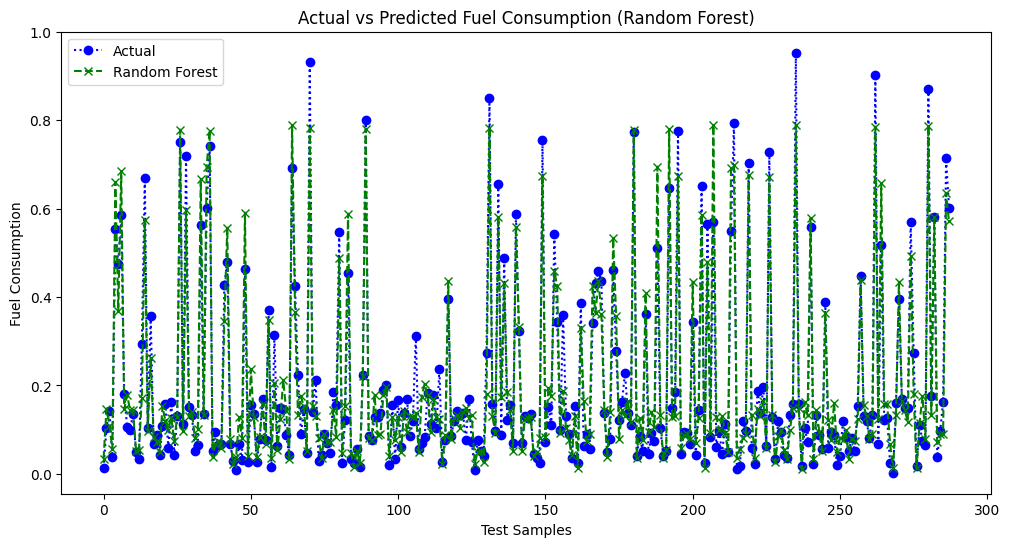

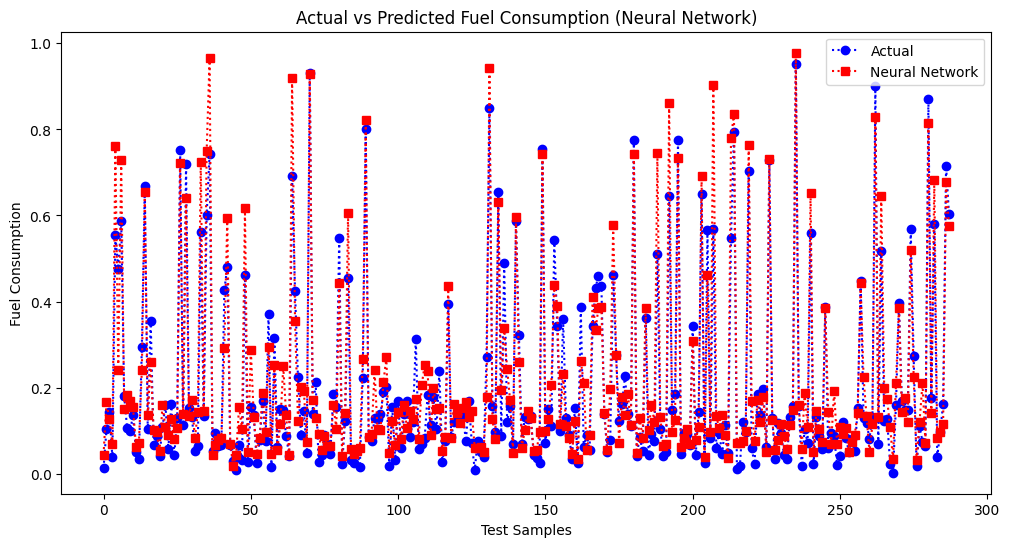

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import load_model
from keras.layers import Input

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the neural network model
nn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the neural network model
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Scale X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

# Generate predictions using the Random Forest model
rf_predictions = best_rf_model.predict(X_test)

# Generate predictions using the Neural Network model
nn_predictions = nn_model.predict(X_test_scaled)

# Create a DataFrame to compare actual vs predicted values for both models
comparison_df_rf_nn = pd.DataFrame({
    "Actual Fuel Consumption": y_test,
    "Random Forest Predicted Fuel Consumption": rf_predictions,
    "Neural Network Predicted Fuel Consumption": nn_predictions.flatten()
})

# Display the first few rows of the DataFrame
print(comparison_df_rf_nn.head())

# Save the comparison to a CSV file if needed
comparison_df_rf_nn.to_csv("actual_vs_predicted_rf_nn.csv", index=False)

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_rf_nn["Actual Fuel Consumption"].values, label="Actual", color="blue", marker='o', linestyle='dotted')
plt.plot(comparison_df_rf_nn["Random Forest Predicted Fuel Consumption"].values, label="Random Forest", color="green", marker='x', linestyle='--')
plt.title("Actual vs Predicted Fuel Consumption (Random Forest)")
plt.xlabel("Test Samples")
plt.ylabel("Fuel Consumption")
plt.legend()
plt.show()

# Plot Actual vs Predicted for Neural Network
plt.figure(figsize=(12, 6))
plt.plot(comparison_df_rf_nn["Actual Fuel Consumption"].values, label="Actual", color="blue", marker='o', linestyle='dotted')
plt.plot(comparison_df_rf_nn["Neural Network Predicted Fuel Consumption"].values, label="Neural Network", color="red", marker='s', linestyle=':')
plt.title("Actual vs Predicted Fuel Consumption (Neural Network)")
plt.xlabel("Test Samples")
plt.ylabel("Fuel Consumption")
plt.legend()
plt.show()

# CO2 Emissions prediction

**Random Forest Regressor**

Random Forest Performance:
MAE: 0.009367383593089387
MSE: 0.00026203971408674085
R²: 0.9936631549152947


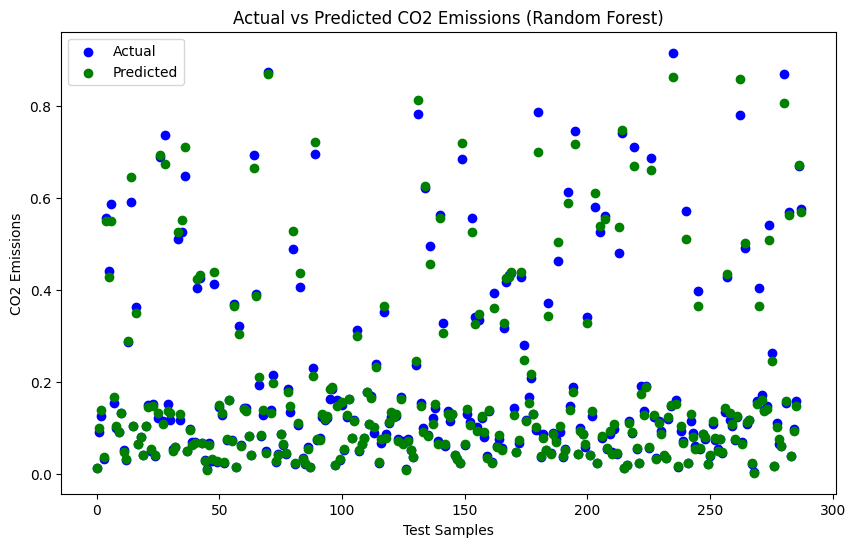

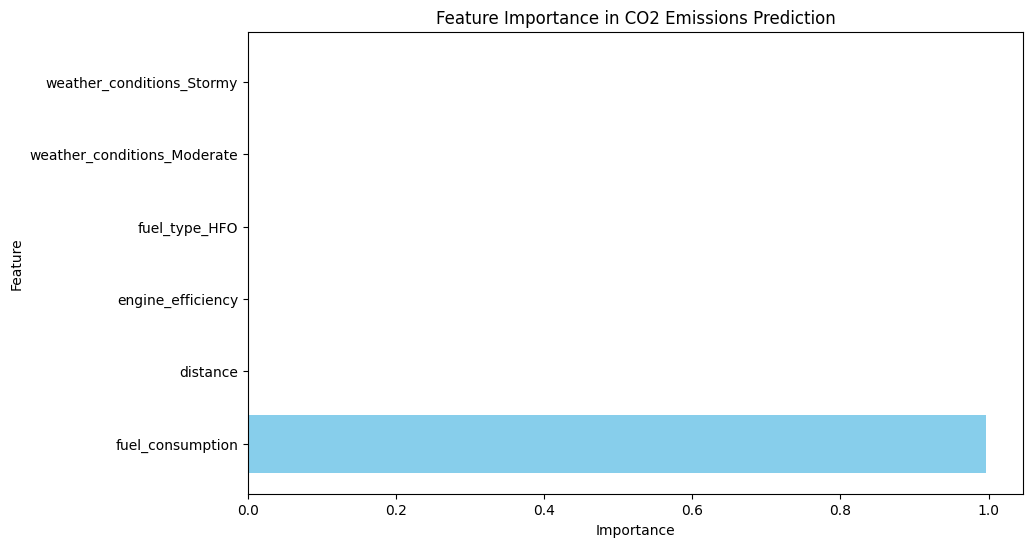

In [ ]:
# Step 1: Feature Selection
X = df[['fuel_type', 'fuel_consumption', 'distance', 'engine_efficiency', 'weather_conditions']]
y = df['co2_emissions']

# Step 2: Encoding and Scaling
X = pd.get_dummies(X, columns=['fuel_type', 'weather_conditions'], drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test)
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Step 6: Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_test)), y_pred, color='green', label='Predicted')
plt.title("Actual vs Predicted CO2 Emissions (Random Forest)")
plt.xlabel("Test Samples")
plt.ylabel("CO2 Emissions")
plt.legend()
plt.show()

# Step 7: Feature Importance
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance in CO2 Emissions Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


**Random Forest, XGBoost, LightGBM, and Neural Network**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 1151, number of used features: 6
[LightGBM] [Info] Start training from score 0.176487
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Custom Stacked Model Performance:
MAE: 0.009777659694866499
MSE: 0.0002811358277463392
R²: 0.9932013580674293


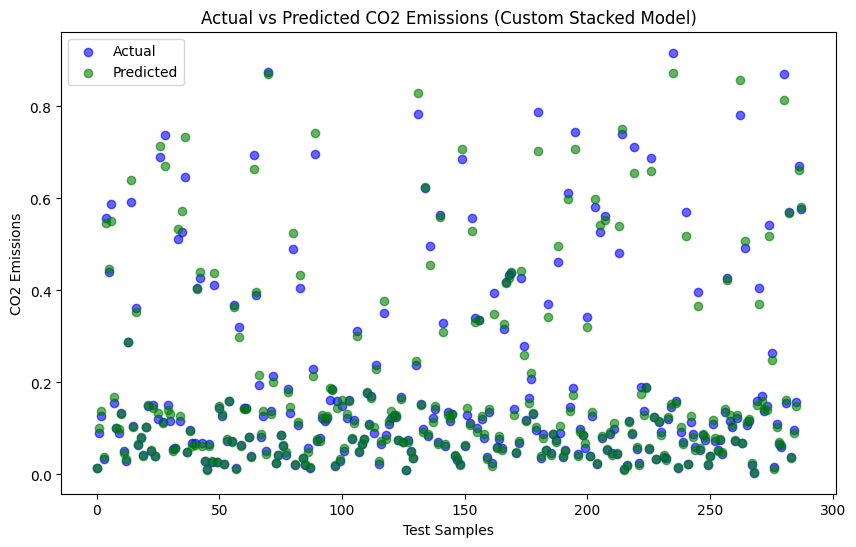

In [ ]:

# Define Neural Network Model
def build_nn_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train Base Models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
lgbm_model = LGBMRegressor(n_estimators=100, random_state=42)

# Scale X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest, XGBoost, and LightGBM
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
lgbm_model.fit(X_train_scaled, y_train)

# Train Neural Network
nn_model = build_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

# Generate Base Model Predictions
rf_preds = rf_model.predict(X_test_scaled)
xgb_preds = xgb_model.predict(X_test_scaled)
lgbm_preds = lgbm_model.predict(X_test_scaled)
nn_preds = nn_model.predict(X_test_scaled).flatten()

# Stack Predictions as New Features for Meta-Model
stacked_features = np.column_stack((rf_preds, xgb_preds, lgbm_preds, nn_preds))

# Meta-Model
meta_model = Ridge(alpha=0.1)
meta_model.fit(stacked_features, y_test)

# Final Predictions
stacked_predictions = meta_model.predict(stacked_features)

# Evaluate the Stacked Model
stacked_mae = mean_absolute_error(y_test, stacked_predictions)
stacked_mse = mean_squared_error(y_test, stacked_predictions)
stacked_r2 = r2_score(y_test, stacked_predictions)

print("Custom Stacked Model Performance:")
print(f"MAE: {stacked_mae}")
print(f"MSE: {stacked_mse}")
print(f"R²: {stacked_r2}")

# Visualize Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(stacked_predictions)), stacked_predictions, color='green', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted CO2 Emissions (Custom Stacked Model)')
plt.xlabel('Test Samples')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.show()


**Observations:**

Very evidently, the model is predicting lower CO2 emissions way more efficiently than the higher ones.

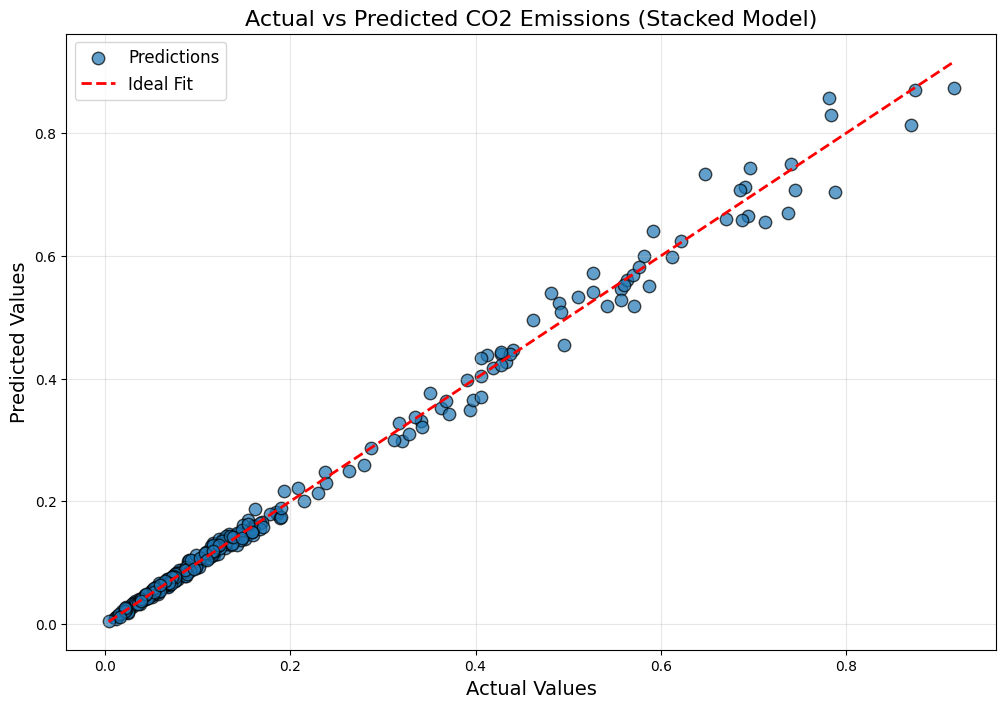

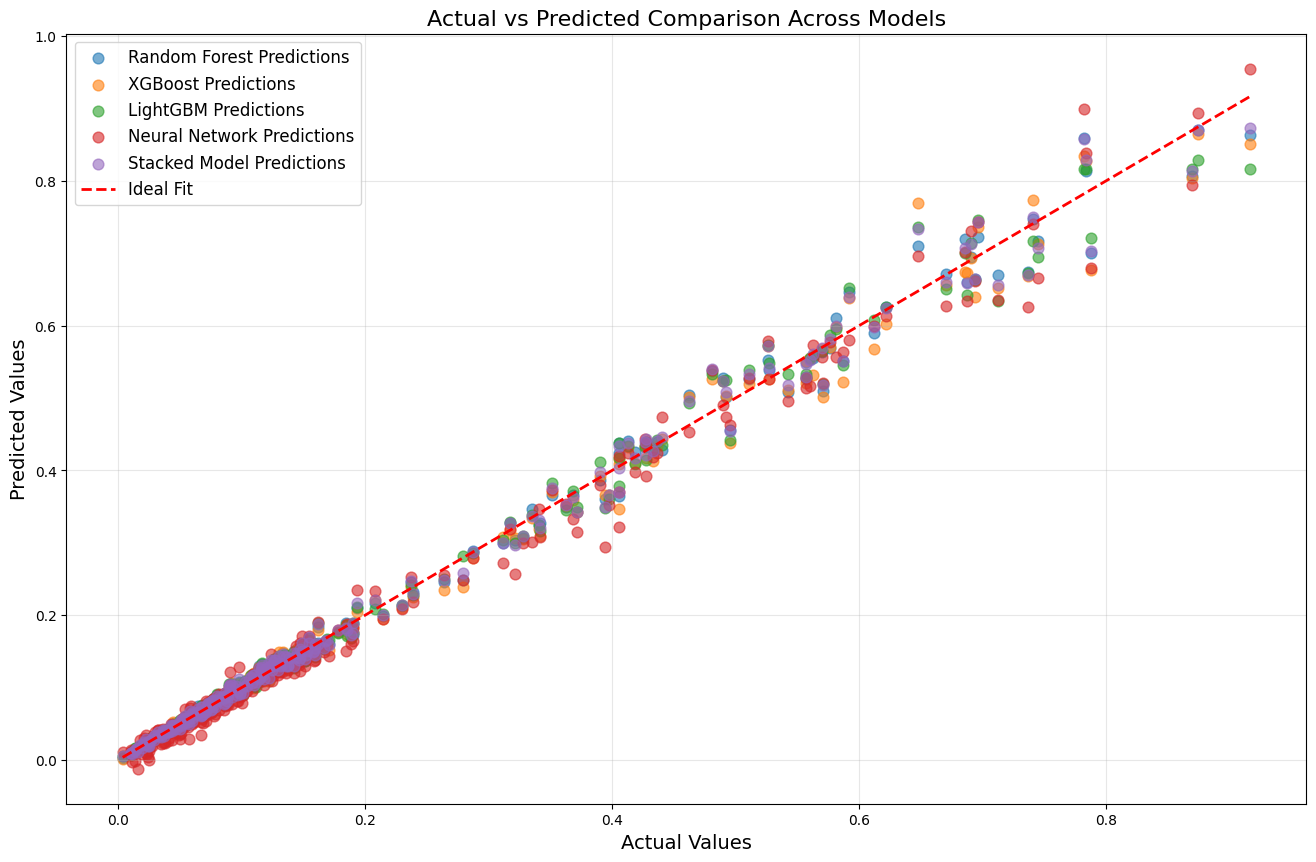

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enhanced Visualization: Actual vs Predicted
def plot_actual_vs_predicted(y_actual, y_predicted, model_name):
    plt.figure(figsize=(12, 8))
    plt.scatter(y_actual, y_predicted, alpha=0.7, edgecolor='k', s=80, label='Predictions')
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.title(f'Actual vs Predicted {model_name}', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Plot Actual vs Predicted for Stacked Model
plot_actual_vs_predicted(y_test, stacked_predictions, "CO2 Emissions (Stacked Model)")

# Side-by-Side Visualization for Base Models
def plot_comparison(y_actual, predictions_dict):
    plt.figure(figsize=(16, 10))

    for model_name, y_pred in predictions_dict.items():
        plt.scatter(y_actual, y_pred, alpha=0.6, label=f'{model_name} Predictions', s=60)

    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
    plt.title('Actual vs Predicted Comparison Across Models', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

# Predictions Dictionary for Base Models
predictions_dict = {
    "Random Forest": rf_preds,
    "XGBoost": xgb_preds,
    "LightGBM": lgbm_preds,
    "Neural Network": nn_preds,
    "Stacked Model": stacked_predictions
}

# Plot Comparison
plot_comparison(y_test, predictions_dict)


# Route Recommendation System

<ipython-input-67-0338c7a0f11f>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.24892923236736852' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q_table.loc[state, action] = q_value + alpha * (reward + gamma * max_next_q - q_value)
<ipython-input-67-0338c7a0f11f>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2920248002643696' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q_table.loc[state, action] = q_value + alpha * (reward + gamma * max_next_q - q_value)
<ipython-input-67-0338c7a0f11f>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6430607494767735' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  q_t

Recommended Routes for Each Initial State:
Port Harcourt-Lagos            Warri-Bonny
Escravos-Lagos         Port Harcourt-Lagos
Warri-Bonny                    Warri-Bonny
Lagos-Apapa            Port Harcourt-Lagos
dtype: category
Categories (4, object): ['Escravos-Lagos', 'Lagos-Apapa', 'Port Harcourt-Lagos', 'Warri-Bonny']


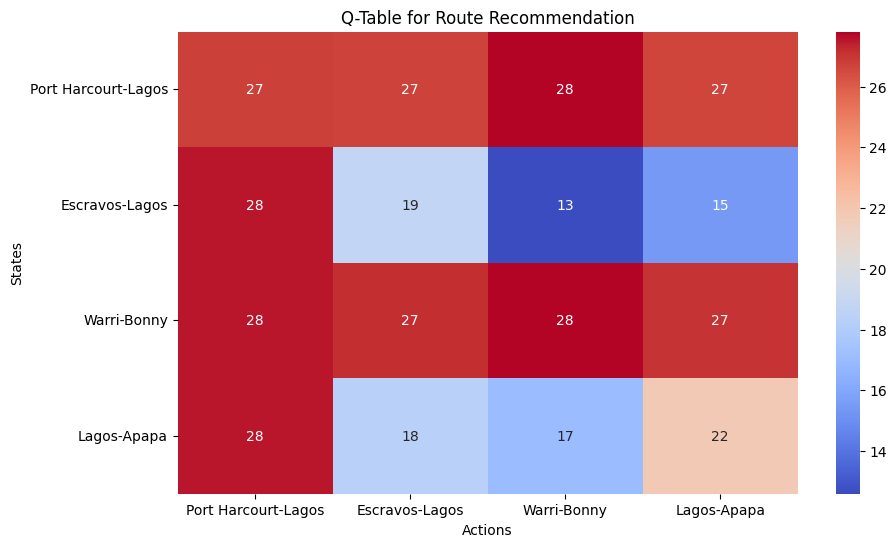

In [67]:
import numpy as np
import pandas as pd

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
episodes = 1000  # Number of episodes
states = df['route_id'].unique()  # States (routes)
actions = states  # Actions (also routes)

# Initialize Q-table
q_table = pd.DataFrame(0, index=states, columns=actions)

# Define Reward Function
def calculate_reward(route, fuel_efficiency, emission_intensity, engine_efficiency):
    return (fuel_efficiency * 0.5) - (emission_intensity * 0.3) + (engine_efficiency * 0.2)

# Training Q-Learning
for episode in range(episodes):
    state = np.random.choice(states)  # Randomly choose an initial state
    done = False

    while not done:
        # Exploration vs. Exploitation
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.choice(actions)  # Explore
        else:
            action = q_table.loc[state].idxmax()  # Exploit

        # Get route metrics (filter numeric columns only)
        route_data = df[df['route_id'] == action].select_dtypes(include=['float64', 'int64']).mean()

        # Calculate metrics for reward
        fuel_efficiency = 1 / route_data['fuel_consumption']
        emission_intensity = route_data['co2_emissions'] / route_data['fuel_consumption']
        engine_efficiency = route_data['engine_efficiency']

        # Calculate reward
        reward = calculate_reward(action, fuel_efficiency, emission_intensity, engine_efficiency)

        # Q-learning update
        q_value = q_table.loc[state, action]
        max_next_q = q_table.loc[action].max()  # Max Q-value for next state
        q_table.loc[state, action] = q_value + alpha * (reward + gamma * max_next_q - q_value)

        # Update state and termination condition
        state = action
        if np.random.uniform(0, 1) < 0.1:  # Terminate episode randomly (for simplicity)
            done = True

# Recommendation Based on Learned Policy
best_routes = q_table.idxmax(axis=1)
print("Recommended Routes for Each Initial State:")
print(best_routes)

# Visualize Q-table
plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, cmap='coolwarm')
plt.title("Q-Table for Route Recommendation")
plt.xlabel("Actions")
plt.ylabel("States")
plt.show()
